In [1]:
import random as rn
import subprocess
import json
from itertools import count
import matplotlib.pyplot as plt


import networkx as nx
import networkx.algorithms.bipartite as bp
import scipy as sp
import numpy as np
import pandas as pd
import altair as alt

In [2]:
models = [bp.complete_bipartite_graph,
          bp.configuration_model,
          bp.havel_hakimi_graph]

In [3]:
def bipartite_set_0(G):
    nodes = [n for n, attrs in G.nodes.data() if attrs['bipartite'] == 0]
    return nodes

In [4]:
def draw_bipartite(G, color_attribute=None):
    
    if color_attribute:
        groups = set(nx.get_node_attributes(G,color_attribute).values())
        mapping = dict(zip(sorted(groups),count()))
        nodes = G.nodes()
        colors = [mapping[G.nodes[n][color_attribute]] if color_attribute in G.nodes[n] else -1 for n in nodes]
        
        nx.draw(G, pos=nx.bipartite_layout(G, nodes=bipartite_set_0(G)), node_color=colors, with_labels=True, cmap=plt.cm.jet)
    else:
        nx.draw(G, pos=nx.bipartite_layout(G, nodes=bipartite_set_0(G)), with_labels=True)

In [5]:
def draw(G):
    nx.draw(G, with_labels=True)    

## Configuration model test

In [6]:
G = bp.configuration_model([3,3,3,3, 2, 2, 1], [4,5,4,2,2])

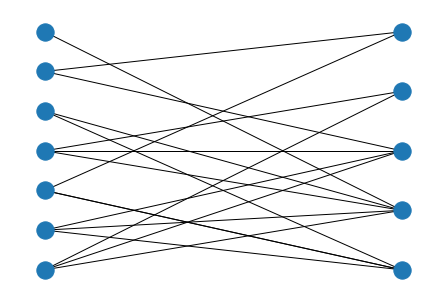

In [7]:
nx.draw(G, pos=nx.bipartite_layout(G, nodes=bipartite_set_0(G)))

## Preferential attachment model

In [8]:
G = bp.preferential_attachment_graph([5, 3, 2, 2, 1], 0.2)

In [9]:
G.nodes.data()

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 1}, 6: {'bipartite': 1}})

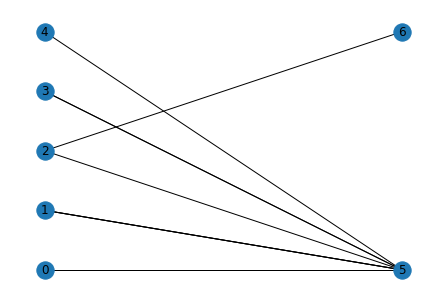

In [10]:
draw_bipartite(G)

## With power law distribution

In [11]:
#a = 100
#r = sp.stats.powerlaw.rvs(a, size=100)

In [74]:
# a = 15
a = 10
# n = 100
n = 15
s = np.random.power(a, n)

In [75]:
s

array([0.90106791, 0.82260254, 0.8605224 , 0.7853224 , 0.9066714 ,
       0.88286818, 0.88123497, 0.88559099, 0.94008649, 0.9649105 ,
       0.93623285, 0.91624869, 0.98746325, 0.97652873, 0.79904136])

In [76]:
source = pd.DataFrame(s, columns=['value'])

In [87]:
alt.Chart(source).mark_bar().encode(
    alt.X("value:Q", bin=alt.Bin(extent=[0, 1], step=0.1)),
    y='count()',
)

alt.Chart(...)

In [94]:
def normalize(values, bounds):
    return np.array([bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values])

In [95]:
bounds = {
    "desired": {"lower": 1, "upper": n},
    "actual": {"lower": 0, "upper": 1}
}

In [99]:
degree_distrib = normalize((1 - s), bounds).astype(int)

In [97]:
# degree_distrib = ((1 - s) * 100).astype(int)

In [100]:
degree_distrib

array([2, 3, 2, 4, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3])

In [101]:
source = pd.DataFrame(degree_distrib, columns=['value'])

In [112]:
alt.Chart(source).mark_bar().encode(
    alt.X("value:Q", bin=alt.Bin(step=1)),
    y='count()',
)

alt.Chart(...)

In [174]:
G = bp.preferential_attachment_graph(degree_distrib, 0.2)

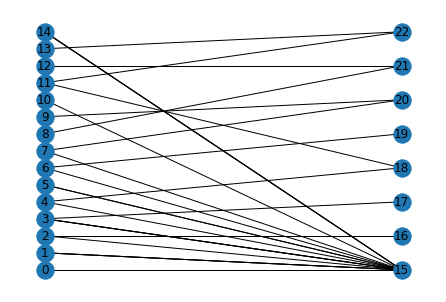

In [175]:
draw_bipartite(G)

In [85]:
G.degree

MultiDegreeView({0: 9, 1: 17, 2: 13, 3: 21, 4: 9, 5: 11, 6: 11, 7: 11, 8: 5, 9: 3, 10: 6, 11: 8, 12: 1, 13: 2, 14: 20, 15: 108, 16: 3, 17: 17, 18: 1, 19: 3, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 3, 31: 1})

In [183]:
def filter_graph(G):
    to_remove = []
    for n, attrs in G.nodes.data():
        if attrs["bipartite"] == 1:
            if G.degree[n] in [0,1]:
                to_remove.append(n)
    
    G.remove_nodes_from(to_remove)

In [184]:
filter_graph(G)

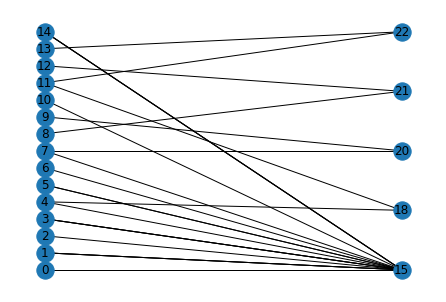

In [185]:
draw_bipartite(G)

## Random Graph

In [22]:
G = bp.random_graph(7, 14, 0.3)

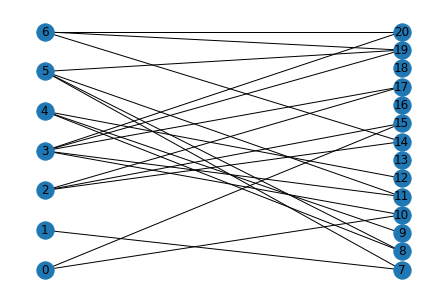

In [23]:
draw_bipartite(G)

## Complete Graphs

In [24]:
G = bp.complete_bipartite_graph(8, 15)

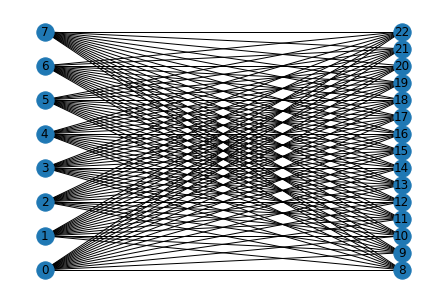

In [25]:
draw_bipartite(G)

## Complete Hypergraph

In [26]:
fp = "generated/graph_complete_0"

In [27]:
G = nx.read_edgelist(open(fp, "rb"))

In [28]:
G = nx.Graph()
with open(fp, "rb") as f:
    lines = f.readlines()
    for edge in lines:
        nodes = edge.decode().split(" ")
        u, v = nodes[0], nodes[1]
        G.add_node(u, bipartite=0)
        G.add_node(v, bipartite=1)
        G.add_edge(u, v)

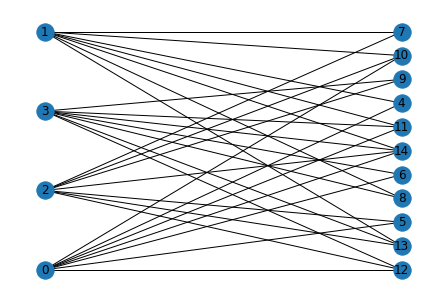

In [29]:
draw_bipartite(G)

## Transform one layer graphs into several layers

In [30]:
# G = nx.DiGraph(nx.path_graph(4))
G = nx.gn_graph(10)  # the GN graph

In [31]:
G.edges.data()

OutEdgeDataView([(1, 0, {}), (2, 0, {}), (3, 0, {}), (4, 1, {}), (5, 0, {}), (6, 5, {}), (7, 4, {}), (8, 3, {}), (9, 0, {})])

In [32]:
def add_weight(G):
    for edge in G.edges():
        G.edges()[edge]["weight"] = rn.randint(1,10)
        G.edges()[edge]["capacity"] = 2        
        G.edges()[edge]["demand"] = 2 

In [33]:
add_weight(G)

In [34]:
G.edges.data()

OutEdgeDataView([(1, 0, {'weight': 8, 'capacity': 2, 'demand': 2}), (2, 0, {'weight': 7, 'capacity': 2, 'demand': 2}), (3, 0, {'weight': 10, 'capacity': 2, 'demand': 2}), (4, 1, {'weight': 10, 'capacity': 2, 'demand': 2}), (5, 0, {'weight': 9, 'capacity': 2, 'demand': 2}), (6, 5, {'weight': 9, 'capacity': 2, 'demand': 2}), (7, 4, {'weight': 10, 'capacity': 2, 'demand': 2}), (8, 3, {'weight': 10, 'capacity': 2, 'demand': 2}), (9, 0, {'weight': 10, 'capacity': 2, 'demand': 2})])

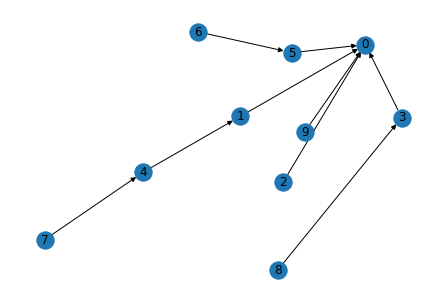

In [35]:
draw(G)

In [36]:
pr = nx.pagerank(G, alpha=0.9)

In [37]:
pr

{0: 0.39236124466293454,
 1: 0.12279599459326418,
 2: 0.045312272278303506,
 3: 0.0860937997840947,
 4: 0.0860937997840947,
 5: 0.0860937997840947,
 6: 0.045312272278303506,
 7: 0.045312272278303506,
 8: 0.045312272278303506,
 9: 0.045312272278303506}

In [38]:
flowCost, flowDict = nx.network_simplex(G)

In [39]:
flowCost, flowDict

(0,
 {0: {},
  1: {0: 0},
  2: {0: 0},
  3: {0: 0},
  4: {1: 0},
  5: {0: 0},
  6: {5: 0},
  7: {4: 0},
  8: {3: 0},
  9: {0: 0}})

In [40]:
G = bp.random_graph(7, 14, 0.3)

In [41]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

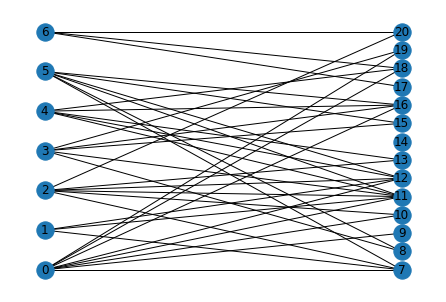

In [42]:
draw_bipartite(G)

In [43]:
pr = nx.pagerank(G, alpha=0.9)

In [44]:
pr

{0: 0.10653768909884448,
 1: 0.03999147757420583,
 2: 0.08071655946332396,
 3: 0.06729366356005448,
 4: 0.06630470176721297,
 5: 0.07771141001420692,
 6: 0.051106183752896835,
 7: 0.0527212594031821,
 8: 0.028744198474830937,
 9: 0.01696036597861977,
 10: 0.02906760147500867,
 11: 0.07676846831587088,
 12: 0.06465585729817075,
 13: 0.029016957769487005,
 14: 0.004975124378109452,
 15: 0.028744198474830937,
 16: 0.052664037970329904,
 17: 0.020306731080868785,
 18: 0.04422657057636775,
 19: 0.029072976996319902,
 20: 0.03241396657725769}

## Transform to pydot for splitting into several layers

In [45]:
G = bp.random_graph(8, 12, 0.3)

In [46]:
G = nx.DiGraph(G)

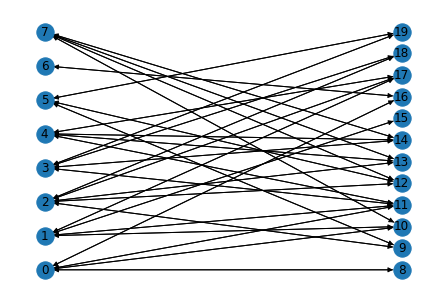

In [47]:
draw_bipartite(G)

In [48]:
# Delete one side of each directed edge
def delete_one_side(G):
    edges_encountered = []
    for edge in sorted(list(G.edges()), key=lambda _: rn.randint(0,1)):
        if set(edge) not in edges_encountered:
            edge_set = set(edge)
            edges_encountered.append(edge_set)
            G.remove_edge(*edge)

In [49]:
delete_one_side(G)

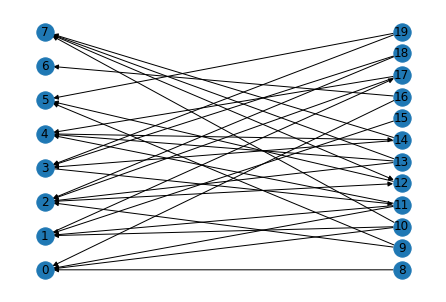

In [50]:
draw_bipartite(G)

In [51]:
P = nx.nx_pydot.to_pydot(G)

In [52]:
P.write_dot("./graph_dot.dot")

In [53]:
bashCommand = "cat graph_dot.dot | gvpr -f ranks.gvpr"

In [54]:
t = subprocess.run(bashCommand, shell=True, capture_output=True)

In [55]:
t.stdout

b'// RANKDIR: TB\nrank of "10"  is 1\nrank of "15"  is 1\nrank of "1"  is 2\nrank of "17"  is 3\nrank of "13"  is 3\nrank of "4"  is 4\nrank of "14"  is 5\nrank of "9"  is 5\nrank of "18"  is 5\nrank of "19"  is 5\nrank of "2"  is 6\nrank of "3"  is 6\nrank of "7"  is 6\nrank of "12"  is 7\nrank of "11"  is 7\nrank of "8"  is 7\nrank of "16"  is 7\nrank of "0"  is 8\nrank of "5"  is 8\nrank of "6"  is 8\n'

In [56]:
def process_ranks_output(gvpr_output):
    ranks = gvpr_output.split("\n")[1:-1]
    for output in ranks:
        node_id = output.split('"')[1]
        rank = str(output.split(' ')[-1])
        print(node_id, rank)

In [57]:
process_ranks_output(t.stdout.decode())

10 1
15 1
1 2
17 3
13 3
4 4
14 5
9 5
18 5
19 5
2 6
3 6
7 6
12 7
11 7
8 7
16 7
0 8
5 8
6 8


In [58]:
#P.write_raw("test_raw")

## check the graphs generated with generator_multilayers.py

In [230]:
N_nodes = 20

In [231]:
with open(f"generated_multilayers/graph_{N_nodes}_13.json") as f:
    G = nx.readwrite.node_link_graph(json.load(f))

In [232]:
G.nodes.data()

NodeDataView({0: {'bipartite': 0, 'rank': 6}, 1: {'bipartite': 0, 'rank': 7}, 2: {'bipartite': 0, 'rank': 3}, 3: {'bipartite': 0, 'rank': 4}, 4: {'bipartite': 0, 'rank': 4}, 5: {'bipartite': 0, 'rank': 0}, 6: {'bipartite': 0, 'rank': 0}, 7: {'bipartite': 0, 'rank': 5}, 8: {'bipartite': 0, 'rank': 3}, 9: {'bipartite': 0, 'rank': 2}, 10: {'bipartite': 0, 'rank': 6}, 11: {'bipartite': 0, 'rank': 1}, 12: {'bipartite': 0, 'rank': 5}, 13: {'bipartite': 0, 'rank': 2}, 14: {'bipartite': 0, 'rank': 0}, 15: {'bipartite': 0, 'rank': 5}, 16: {'bipartite': 0, 'rank': 1}, 17: {'bipartite': 0, 'rank': 2}, 18: {'bipartite': 0, 'rank': 6}, 19: {'bipartite': 0, 'rank': 7}, 53: {'bipartite': 1}})

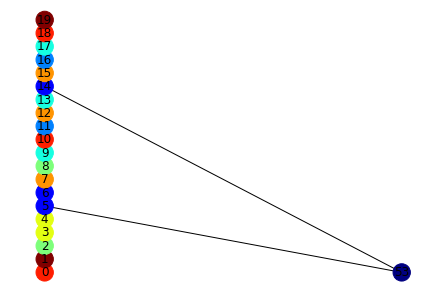

In [233]:
draw_bipartite(G, color_attribute="rank")

## Check the one layer graphs generated

In [205]:
N_nodes = 109

In [206]:
with open(f"generated/graph_preferential_{N_nodes}") as f:
    G = nx.readwrite.edgelist.parse_edgelist(f.readlines())

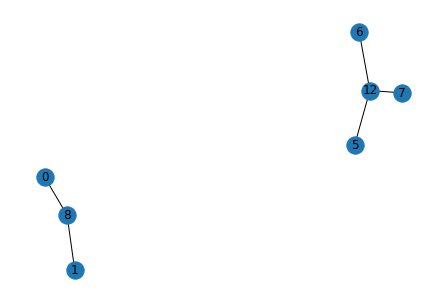

In [207]:
draw(G)